x축이 시간관련 데이터....
  - 심전도, 주식시세, 음성인식, 유전자 염기서열
  - LSTM
  - 가변길이이고 벡터형태
    - 매일 기온측정 a1=(10) a2=(20) ..

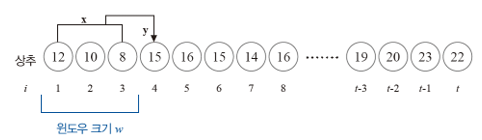

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv')
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048
...,...,...,...,...,...,...
360,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497
361,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942
362,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834
363,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746


In [3]:
df['realdate'] =  pd.to_datetime( df['Date'] )

In [4]:
sorted_df = df.sort_values(by = 'realdate')
sorted_df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),realdate
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016,2019-02-28
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022,2019-03-01
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498,2019-03-02
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216,2019-03-03
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048,2019-03-04
...,...,...,...,...,...,...,...
360,BTC,2020-02-24,9919.551448,9689.085992,10008.540472,9666.519497,2020-02-24
361,BTC,2020-02-25,9640.469505,9921.048562,10008.378491,9480.185942,2020-02-25
362,BTC,2020-02-26,9392.869629,9640.468562,9679.595090,9251.115834,2020-02-26
363,BTC,2020-02-27,8787.978363,9392.868579,9393.864137,8626.935746,2020-02-27


In [5]:
seq =  sorted_df['Closing Price (USD)'].to_numpy()

In [6]:
# 앞의 5개만 선택해서 그래프로 그려보겠습니다.

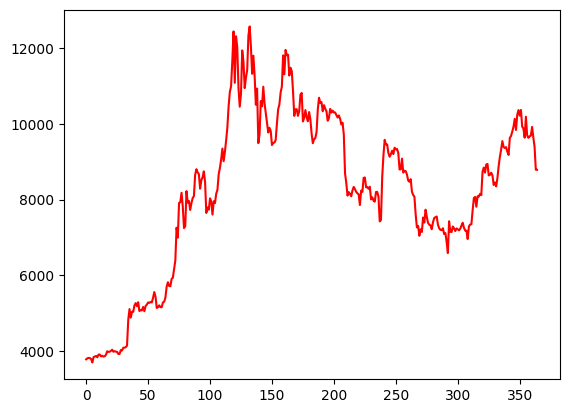

In [7]:
import matplotlib.pyplot as plt
plt.plot(seq, color='red')
plt.show()

In [8]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
window_size = 5
len(seq)

365

In [9]:
window_size = 5
temp = list(range(10))
x,y = [],[]
for i in range(len(temp)):
  _y = i+window_size
  if _y == len(temp):
    break
  x.append(temp[i:i+window_size ] )
  y.append(temp[_y])

In [10]:
pd.DataFrame({
    'x' : x,
    'y' : y
})

,x,y
0,"[0, 1, 2, 3, 4]",5
1,"[1, 2, 3, 4, 5]",6
2,"[2, 3, 4, 5, 6]",7
3,"[3, 4, 5, 6, 7]",8
4,"[4, 5, 6, 7, 8]",9


In [11]:
import numpy as np
def seq2dataset(seq,window_size):
  x,y = [],[]
  for i in range(len(seq)):
    _y = i+window_size
    if _y == len(seq):
      break
    x.append(seq[i:i+window_size ] )
    y.append(seq[_y])
  return np.array(x),np.array(y)

In [12]:
x,y = seq2dataset(seq,7)

순환신경망에서는 LSTM을 사용함

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [14]:
split = int(len(x)*0.7)
x_train = x[:split]; y_train = y[:split]
x_test = x[split:]; y_test = y[split:]


In [15]:
x_train_reshape = x_train.reshape(-1,7,1)
x_test_reshape = x_test.reshape(-1,7,1)
x_train_reshape.shape,  x_train_reshape[0].shape

((250, 7, 1), (7, 1))

In [ ]:
model = Sequential([
    LSTM(128,activation='relu', input_shape=x_train_reshape[0].shape),
    Dense(1)  # 선형이기때문에
])
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist = model.fit(x_train_reshape,y_train,epochs=200,batch_size=1,validation_data = (x_test_reshape,y_test))

In [18]:
model.evaluate(x_test_reshape,y_test)

4/4 [==============================] - 0s 13ms/step - loss: 183.2476 - mae: 183.2476


[183.2476348876953, 183.2476348876953]

In [19]:
pred = model.predict(x_test_reshape)

4/4 [==============================] - 0s 4ms/step


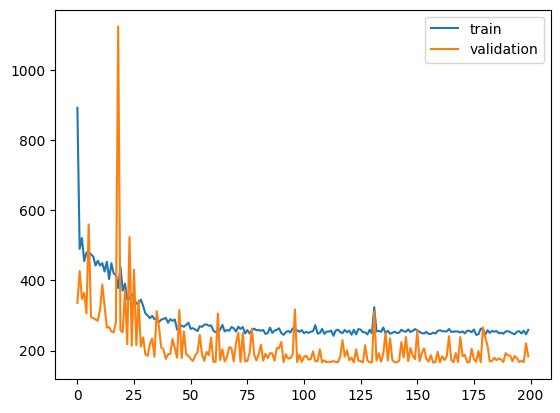

In [20]:
plt.plot(hist.history['mae'],label='train')
plt.plot(hist.history['val_mae'], label='validation')
plt.legend()
plt.show()

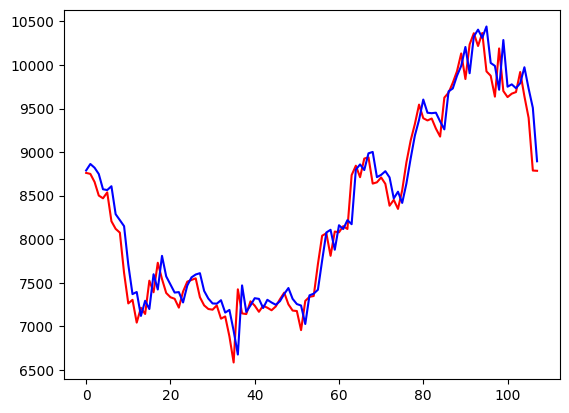

In [22]:
# 예측결과
plt.plot(y_test,color='red')
plt.plot(pred,color='blue')
plt.show()

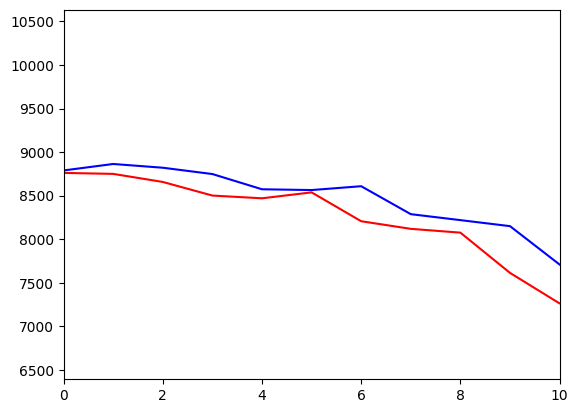

In [24]:
# 예측결과
plt.plot(y_test,color='red')
plt.plot(pred,color='blue')
plt.xlim(0,10)
plt.show()